In [1]:
#掛接雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn import ensemble, metrics, model_selection, utils 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc

os.chdir('/content/drive/My Drive/Colab Notebooks')
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

In [3]:
#讀文字檔

In [4]:
train_data = pd.read_table('train.txt', sep=";" , header = None).rename(columns = {0: 'sentence', 1: 'label'})
train_label = train_data["label"]

In [5]:
valid_data = pd.read_table('val.txt', sep=";" , header = None).rename(columns = {0: 'sentence', 1: 'label'})
valid_label = valid_data["label"]
#valid_label

In [6]:
train_valid_data = pd.concat([train_data, valid_data], ignore_index=True)
train_valid_label = train_valid_data['label']

In [7]:
test_data = pd.read_table('test.txt', sep=";" , header = None).rename(columns = {0: 'sentence', 1: 'label'})
test_label = test_data["label"]

In [8]:
#version 1 
#讀 dummy variable 

In [9]:
train_dummy = pd.read_csv("tfidf_train_dummy.csv", header = 0, index_col = 0)
train_dummy

,didnt,humiliate,go,feel,hopeless,damned,hopeful,care,awake,grab,...,riotousrambling,spain,portugal,philosophical,terrorise,forsake,squirm,aunty,saved,braeden
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15996,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15997,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15998,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
valid_dummy = pd.read_csv("version1_valid_dummy.csv", header = 0, index_col = 0)
#valid_dummy

In [11]:
test_dummy = pd.read_csv("version1_test_dummy.csv", header = 0, index_col = 0)
#test_dummy

In [12]:
#shuffle train data 
train_dummy.insert(5762, 'emotion_label', train_data['label'])
train_dummy_label = utils.shuffle(train_dummy, random_state = 10) 
train_label = train_dummy_label["emotion_label"]
train_label

13184       fear
13298      anger
12893        joy
1174        love
6384     sadness
          ...   
11633        joy
1344     sadness
12815    sadness
7293       anger
1289       anger
Name: emotion_label, Length: 16000, dtype: object

In [13]:
train_dummy = train_dummy_label.drop('emotion_label', axis = 1)
train_dummy

,didnt,humiliate,go,feel,hopeless,damned,hopeful,care,awake,grab,...,riotousrambling,spain,portugal,philosophical,terrorise,forsake,squirm,aunty,saved,braeden
13184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13298,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12893,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1174,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6384,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11633,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7293,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#shuffle valid data
valid_dummy.insert(5762, 'emotion_label', valid_data['label'])
valid_dummy_label = utils.shuffle(valid_dummy, random_state = 10) 
valid_label = valid_dummy_label["emotion_label"]
valid_label

115      sadness
1779       anger
1449         joy
145         love
1009    surprise
          ...   
1393     sadness
1344    surprise
527         fear
1149     sadness
1289       anger
Name: emotion_label, Length: 2000, dtype: object

In [15]:
valid_dummy = valid_dummy_label.drop('emotion_label', axis = 1)
valid_dummy

,didnt,humiliate,go,feel,hopeless,damned,hopeful,care,awake,grab,...,riotousrambling,spain,portugal,philosophical,terrorise,forsake,squirm,aunty,saved,braeden
115,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1779,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1449,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,0,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1009,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1149,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# shuffle test
test_dummy.insert(5762, 'emotion_label', test_data['label'])
test_dummy_label = utils.shuffle(test_dummy, random_state = 10) 
test_label = test_dummy_label["emotion_label"]
test_label

115         joy
1779    sadness
1449        joy
145     sadness
1009        joy
         ...   
1393    sadness
1344    sadness
527     sadness
1149      anger
1289      anger
Name: emotion_label, Length: 2000, dtype: object

In [17]:
test_dummy = test_dummy_label.drop('emotion_label', axis = 1)
test_dummy

,didnt,humiliate,go,feel,hopeless,damned,hopeful,care,awake,grab,...,riotousrambling,spain,portugal,philosophical,terrorise,forsake,squirm,aunty,saved,braeden
115,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1449,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1009,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1149,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
## 建模
forest = ensemble.RandomForestClassifier(random_state = 10)
model = forest.fit(train_dummy, train_label)

In [19]:
# 預測valid data
valid_label_predicted = model.predict(valid_dummy)
# accuracy 
accuracy = metrics.accuracy_score(valid_label, valid_label_predicted)
accuracy

0.779

In [20]:
# precision recall fscore 
precision_recall_fscore_support = metrics.precision_recall_fscore_support(valid_label, valid_label_predicted, labels = forest.classes_)
precision_recall_fscore_support = pd.DataFrame(precision_recall_fscore_support, columns = forest.classes_, index = ["precision", "recall", "fscore", "support"])
precision_recall_fscore_support

,anger,fear,joy,love,sadness,surprise
precision,0.739927,0.729469,0.842486,0.688742,0.765886,0.759494
recall,0.734545,0.712264,0.828125,0.584270,0.832727,0.740741
fscore,0.737226,0.720764,0.835244,0.632219,0.797909,0.750000
support,275.000000,212.000000,704.000000,178.000000,550.000000,81.000000


In [21]:
# 預測test data
test_label_predicted = model.predict(test_dummy)
# accuracy 
accuracy = metrics.accuracy_score(test_label, test_label_predicted)
accuracy

0.778

In [22]:
# precision recall fscore 
precision_recall_fscore_support = metrics.precision_recall_fscore_support(test_label, test_label_predicted, labels = forest.classes_)
precision_recall_fscore_support = pd.DataFrame(precision_recall_fscore_support, columns = forest.classes_, index = ["precision", "recall", "fscore", "support"])
precision_recall_fscore_support.to_excel('version1_metric_table.xlsx')
precision_recall_fscore_support

,anger,fear,joy,love,sadness,surprise
precision,0.769811,0.738318,0.846715,0.621429,0.780998,0.560000
recall,0.741818,0.705357,0.834532,0.547170,0.834768,0.636364
fscore,0.755556,0.721461,0.840580,0.581940,0.806988,0.595745
support,275.000000,224.000000,695.000000,159.000000,581.000000,66.000000


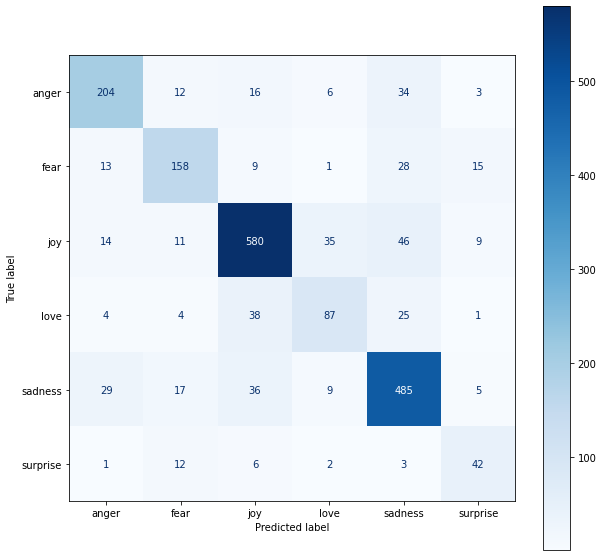

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
metrics.ConfusionMatrixDisplay.from_predictions(test_label, test_label_predicted, cmap = "Blues", display_labels = forest.classes_, ax = ax)
plt.savefig("version1_confusion_matrix.png")
plt.show()

In [ ]:
del train_data, valid_data, train_dummy, valid_dummy, test_dummy
del train_dummy_label, valid_dummy_label, test_dummy_label, forest, model, precision_recall_fscore_support, fig, ax
gc.collect()

50

In [ ]:
# version 2 
# 讀 dummy variable

In [ ]:
train_valid_dummy = pd.read_csv("tfidf_train_valid_dummy.csv", header = 0, index_col = 0)
train_valid_dummy

,didnt,humiliate,go,feel,hopeless,damned,hopeful,care,awake,grab,...,lolll,blissful,healing,scientific,bellmont,parisian,mash,jrock,internalize,ssa
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17997,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17998,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_dummy = pd.read_csv("version2_test_dummy.csv", header = 0, index_col = 0)

In [ ]:
#shuffle train_valid
train_valid_dummy.insert(6104, 'emotion_label', train_valid_data['label'])
train_valid_dummy_label = utils.shuffle(train_valid_dummy, random_state = 10) 
train_valid_label = train_valid_dummy_label["emotion_label"]
train_valid_label

10802     sadness
5034         fear
7641     surprise
15243     sadness
17469       anger
           ...   
9372          joy
7291          joy
17728         joy
7293        anger
17673       anger
Name: emotion_label, Length: 18000, dtype: object

In [ ]:
train_valid_dummy = train_valid_dummy_label.drop('emotion_label', axis = 1)
train_valid_dummy

,didnt,humiliate,go,feel,hopeless,damned,hopeful,care,awake,grab,...,lolll,blissful,healing,scientific,bellmont,parisian,mash,jrock,internalize,ssa
10802,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5034,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7641,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17469,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7291,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17728,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7293,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# shuffle test
test_dummy.insert(6104, 'emotion_label', test_data['label'])
test_dummy_label = utils.shuffle(test_dummy, random_state = 10) 
test_label = test_dummy_label["emotion_label"]
test_label

115         joy
1779    sadness
1449        joy
145     sadness
1009        joy
         ...   
1393    sadness
1344    sadness
527     sadness
1149      anger
1289      anger
Name: emotion_label, Length: 2000, dtype: object

In [ ]:
test_dummy = test_dummy_label.drop('emotion_label', axis = 1)
test_dummy

,didnt,humiliate,go,feel,hopeless,damned,hopeful,care,awake,grab,...,lolll,blissful,healing,scientific,bellmont,parisian,mash,jrock,internalize,ssa
115,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1449,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1009,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1149,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## 建模
forest = ensemble.RandomForestClassifier(random_state = 10)
model = forest.fit(train_valid_dummy, train_valid_label)

In [ ]:
# 預測test data
test_label_predicted = model.predict(test_dummy)
# accuracy 
accuracy = metrics.accuracy_score(test_label, test_label_predicted)
accuracy

0.7715

In [ ]:
# precision recall fscore 
precision_recall_fscore_support = metrics.precision_recall_fscore_support(test_label, test_label_predicted, labels = forest.classes_)
precision_recall_fscore_support = pd.DataFrame(precision_recall_fscore_support, columns = forest.classes_, index = ["precision", "recall", "fscore", "support"])
precision_recall_fscore_support.to_excel('version2_metric_table.xlsx')
precision_recall_fscore_support

,anger,fear,joy,love,sadness,surprise
precision,0.746269,0.750000,0.830460,0.620438,0.777778,0.600000
recall,0.727273,0.709821,0.831655,0.534591,0.819277,0.681818
fscore,0.736648,0.729358,0.831057,0.574324,0.797988,0.638298
support,275.000000,224.000000,695.000000,159.000000,581.000000,66.000000


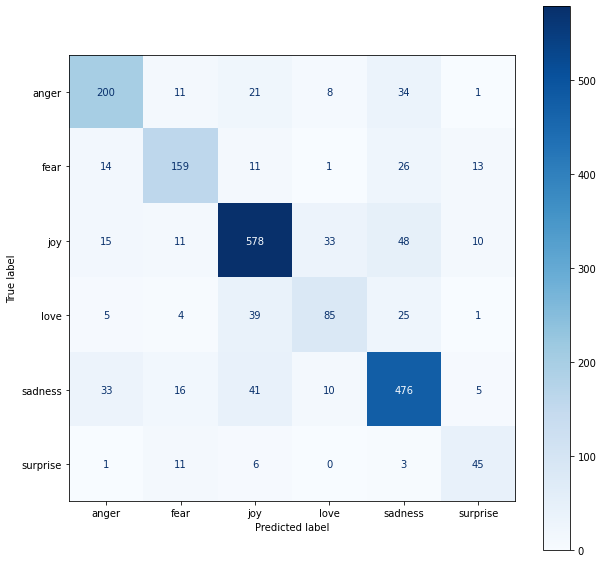

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
metrics.ConfusionMatrixDisplay.from_predictions(test_label, test_label_predicted, cmap = "Blues", display_labels = forest.classes_, ax = ax)
plt.savefig("version2_confusion_matrix.png")
plt.show()

In [ ]:
del train_valid_dummy, test_dummy, train_valid_dummy_label, test_dummy_label, forest, model, precision_recall_fscore_support, fig, ax
gc.collect()

5708

In [ ]:
#version 3

In [ ]:
train_valid_dummy = pd.read_csv("train_valid_dummy.csv", header = 0, index_col = 0)
train_valid_dummy

,didnt,humiliate,go,feel,hopeless,damned,hopeful,care,awake,grab,...,bellmont,parisian,moreover,mandate,mash,jrock,internalize,objectively,smarter,ssa
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17997,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17998,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_dummy = pd.read_csv("version3_test_dummy.csv", header = 0, index_col = 0)

In [ ]:
#shuffle train_valid
train_valid_dummy.insert(6833, 'emotion_label', train_valid_data['label'])
train_valid_dummy_label = utils.shuffle(train_valid_dummy, random_state = 10) 
train_valid_label = train_valid_dummy_label["emotion_label"]
train_valid_label

10802     sadness
5034         fear
7641     surprise
15243     sadness
17469       anger
           ...   
9372          joy
7291          joy
17728         joy
7293        anger
17673       anger
Name: emotion_label, Length: 18000, dtype: object

In [ ]:
train_valid_dummy = train_valid_dummy_label.drop('emotion_label', axis = 1)
train_valid_dummy

,didnt,humiliate,go,feel,hopeless,damned,hopeful,care,awake,grab,...,bellmont,parisian,moreover,mandate,mash,jrock,internalize,objectively,smarter,ssa
10802,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5034,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7641,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17469,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7291,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17728,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7293,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# shuffle test
test_dummy.insert(6833, 'emotion_label', test_data['label'])
test_dummy_label = utils.shuffle(test_dummy, random_state = 10) 
test_label = test_dummy_label["emotion_label"]
test_label

115         joy
1779    sadness
1449        joy
145     sadness
1009        joy
         ...   
1393    sadness
1344    sadness
527     sadness
1149      anger
1289      anger
Name: emotion_label, Length: 2000, dtype: object

In [ ]:
test_dummy = test_dummy_label.drop('emotion_label', axis = 1)
test_dummy

,didnt,humiliate,go,feel,hopeless,damned,hopeful,care,awake,grab,...,bellmont,parisian,moreover,mandate,mash,jrock,internalize,objectively,smarter,ssa
115,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1449,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1009,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1149,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## 建模
forest = ensemble.RandomForestClassifier(random_state = 10)
model = forest.fit(train_valid_dummy, train_valid_label)

In [ ]:
# 預測test data
test_label_predicted = model.predict(test_dummy)
# accuracy 
accuracy = metrics.accuracy_score(test_label, test_label_predicted)
accuracy

0.7725

In [ ]:
# precision recall fscore 
precision_recall_fscore_support = metrics.precision_recall_fscore_support(test_label, test_label_predicted, labels = forest.classes_)
precision_recall_fscore_support = pd.DataFrame(precision_recall_fscore_support, columns = forest.classes_, index = ["precision", "recall", "fscore", "support"])
precision_recall_fscore_support.to_excel('version3_metric_table.xlsx')
precision_recall_fscore_support   

,anger,fear,joy,love,sadness,surprise
precision,0.739927,0.752381,0.840876,0.595745,0.777958,0.608108
recall,0.734545,0.705357,0.828777,0.528302,0.826162,0.681818
fscore,0.737226,0.728111,0.834783,0.560000,0.801336,0.642857
support,275.000000,224.000000,695.000000,159.000000,581.000000,66.000000


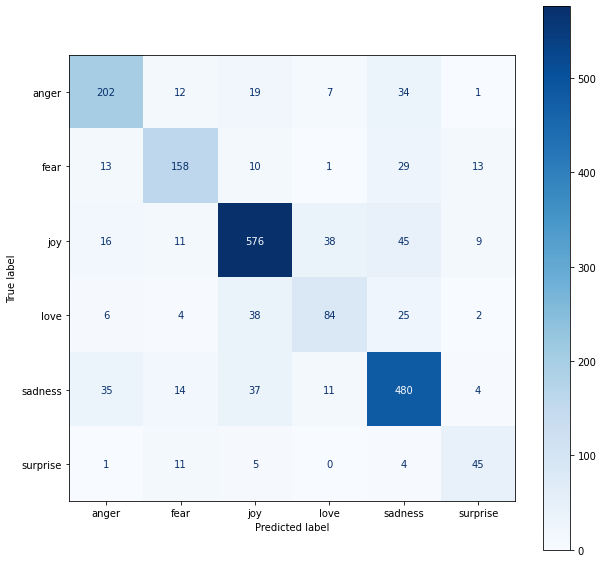

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
metrics.ConfusionMatrixDisplay.from_predictions(test_label, test_label_predicted, cmap = "Blues", display_labels = forest.classes_, ax = ax)
plt.savefig("version3_confusion_matrix.png")
plt.show()

In [ ]:
del train_valid_dummy, test_dummy, train_valid_dummy_label, test_dummy_label, forest, model, precision_recall_fscore_support, fig, ax
gc.collect()

5805

In [ ]:
#version 4 

In [ ]:
train_valid_dummy = pd.read_csv("with_nouns_train_valid_dummy.csv", header = 0, index_col = 0)
train_valid_dummy

,didnt,feel,humiliate,go,hopeless,damned,hopeful,around,someone,care,...,mash,jrock,tommorrow,internalize,objectively,textbook,rye,saying,inclusion,ssa
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17997,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_dummy = pd.read_csv("version4_test_dummy.csv", header = 0, index_col = 0)

In [ ]:
#shuffle train_valid
train_valid_dummy.insert(12942, 'emotion_label', train_valid_data['label'])
train_valid_dummy_label = utils.shuffle(train_valid_dummy, random_state = 10) 
train_valid_label = train_valid_dummy_label["emotion_label"]
train_valid_label

10802     sadness
5034         fear
7641     surprise
15243     sadness
17469       anger
           ...   
9372          joy
7291          joy
17728         joy
7293        anger
17673       anger
Name: emotion_label, Length: 18000, dtype: object

In [ ]:
train_valid_dummy = train_valid_dummy_label.drop('emotion_label', axis = 1)
train_valid_dummy

,didnt,feel,humiliate,go,hopeless,damned,hopeful,around,someone,care,...,mash,jrock,tommorrow,internalize,objectively,textbook,rye,saying,inclusion,ssa
10802,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5034,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7641,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17469,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7291,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17728,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7293,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# shuffle test
test_dummy.insert(12942, 'emotion_label', test_data['label'])
test_dummy_label = utils.shuffle(test_dummy, random_state = 10) 
test_label = test_dummy_label["emotion_label"]
test_label

115         joy
1779    sadness
1449        joy
145     sadness
1009        joy
         ...   
1393    sadness
1344    sadness
527     sadness
1149      anger
1289      anger
Name: emotion_label, Length: 2000, dtype: object

In [ ]:
test_dummy = test_dummy_label.drop('emotion_label', axis = 1)
test_dummy

,didnt,feel,humiliate,go,hopeless,damned,hopeful,around,someone,care,...,mash,jrock,tommorrow,internalize,objectively,textbook,rye,saying,inclusion,ssa
115,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1779,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1449,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1009,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1149,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
del train_valid_dummy_label, test_dummy_label
gc.collect()

50

In [ ]:
# before tuning

In [ ]:
## 建模 num_feature = 12942
forest = ensemble.RandomForestClassifier(random_state = 10) 
model = forest.fit(train_valid_dummy, train_valid_label)

In [ ]:
# train_valid 的 accuracy, precision, recall, fscore, confusion matrix

In [ ]:
train_valid_label_predicted = model.predict(train_valid_dummy)
# accuracy 
accuracy = metrics.accuracy_score(train_valid_label, train_valid_label_predicted)
accuracy

0.9975

In [ ]:
# precision recall fscore 
precision_recall_fscore_support = metrics.precision_recall_fscore_support(train_valid_label, train_valid_label_predicted, labels = forest.classes_)
precision_recall_fscore_support = pd.DataFrame(precision_recall_fscore_support, columns = forest.classes_, index = ["precision", "recall", "fscore", "support"])
precision_recall_fscore_support.to_excel('version4_before_tuning_train_valid_metric_table.xlsx')
precision_recall_fscore_support

,anger,fear,joy,love,sadness,surprise
precision,0.996311,0.997668,0.998022,0.992573,0.999425,0.992366
recall,0.998767,0.995347,0.998022,0.991903,0.999041,0.995406
fscore,0.997538,0.996506,0.998022,0.992238,0.999233,0.993884
support,2434.000000,2149.000000,6066.000000,1482.000000,5216.000000,653.000000


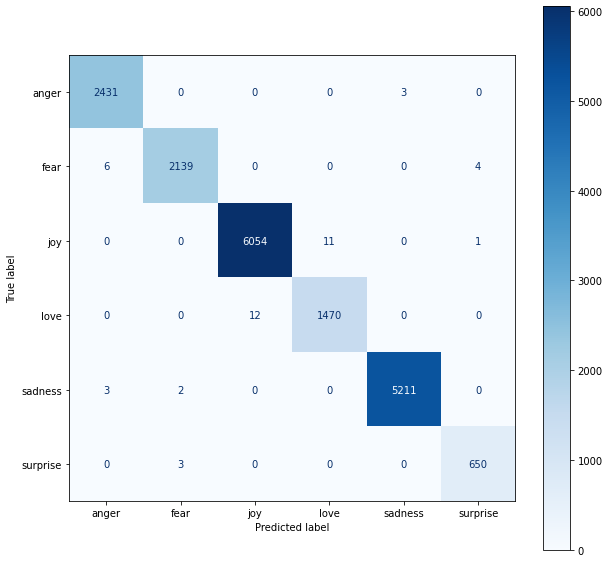

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
metrics.ConfusionMatrixDisplay.from_predictions(train_valid_label, train_valid_label_predicted, cmap = "Blues", display_labels = forest.classes_, ax = ax)
plt.savefig("before_tuning_train_valid_c_matrix.png")
plt.show()

In [ ]:
# test 的 accuracy, precision, recall, fscore, confusion matrix

In [ ]:
#predict test data
test_label_predicted = model.predict(test_dummy)
# accuracy 
accuracy = metrics.accuracy_score(test_label, test_label_predicted)
accuracy

0.8645

In [ ]:
# precision recall fscore 
precision_recall_fscore_support = metrics.precision_recall_fscore_support(test_label, test_label_predicted, labels = forest.classes_)
precision_recall_fscore_support = pd.DataFrame(precision_recall_fscore_support, columns = forest.classes_, index = ["precision", "recall", "fscore", "support"])
precision_recall_fscore_support.to_excel('version4_before_tuning_test_metric_table.xlsx')
precision_recall_fscore_support

,anger,fear,joy,love,sadness,surprise
precision,0.859649,0.806867,0.898844,0.693750,0.926916,0.623188
recall,0.890909,0.839286,0.894964,0.698113,0.895009,0.651515
fscore,0.875000,0.822757,0.896900,0.695925,0.910683,0.637037
support,275.000000,224.000000,695.000000,159.000000,581.000000,66.000000


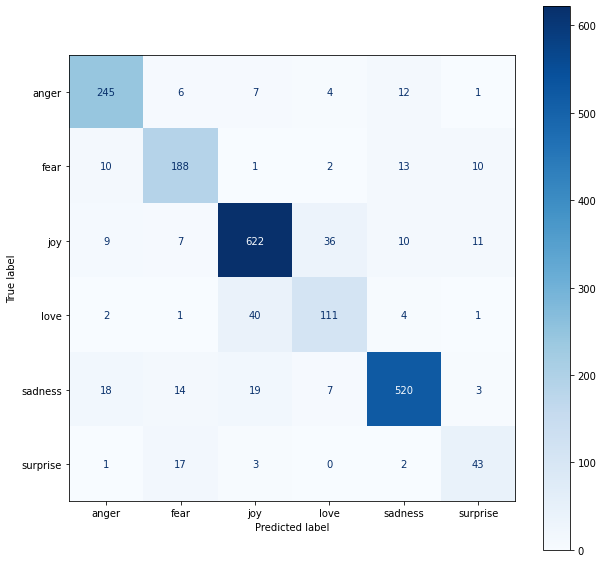

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
metrics.ConfusionMatrixDisplay.from_predictions(test_label, test_label_predicted, cmap = "Blues", display_labels = forest.classes_, ax = ax)
plt.savefig("version4_before_tuning_c_matrix.png")
plt.show()

In [ ]:
#after tuning

In [ ]:
#max_features = max number of features considered for splitting a node
#min_samples_split = min number of data points placed in a node before the node is split 
#          We generally keep min_samples_split value between 2 and 6. However, the default value is set to 2.
#min_samples_leaf = min number of data points allowed in a leaf node
#          The default value is set to 1.
#max_depth = the max layer which each tree can grow 

forest = ensemble.RandomForestClassifier(random_state = 10, max_depth = 357, min_samples_leaf = 2) #max_depth 357 , min_sample_leaf = 2
model = forest.fit(train_valid_dummy, train_valid_label)

In [ ]:
# train_valid 的 accuracy, precision, recall, fscore, confusion matrix

In [ ]:
train_valid_label_predicted = model.predict(train_valid_dummy)
# accuracy 
accuracy = metrics.accuracy_score(train_valid_label, train_valid_label_predicted)
accuracy

0.8825555555555555

In [ ]:
# precision recall fscore 
precision_recall_fscore_support = metrics.precision_recall_fscore_support(train_valid_label, train_valid_label_predicted, labels = forest.classes_)
precision_recall_fscore_support = pd.DataFrame(precision_recall_fscore_support, columns = forest.classes_, index = ["precision", "recall", "fscore", "support"])
precision_recall_fscore_support.to_excel('version4_after_tuning_train_valid_metric_table.xlsx')
precision_recall_fscore_support

,anger,fear,joy,love,sadness,surprise
precision,0.887990,0.840090,0.867096,0.864187,0.923915,0.858223
recall,0.856615,0.867846,0.931421,0.674089,0.926572,0.695253
fscore,0.872020,0.853742,0.898108,0.757392,0.925242,0.768190
support,2434.000000,2149.000000,6066.000000,1482.000000,5216.000000,653.000000


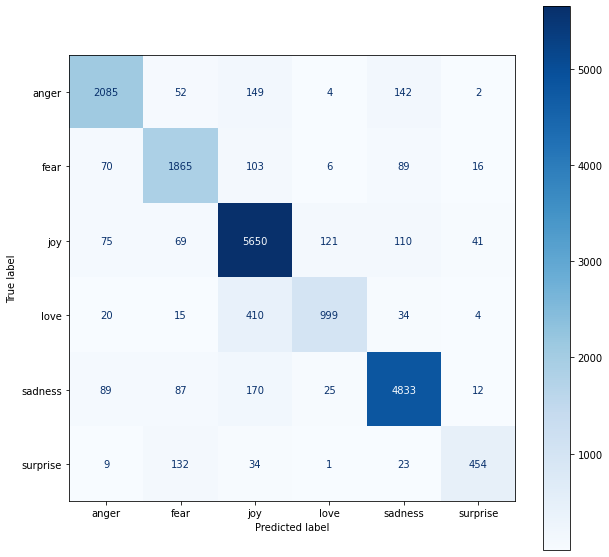

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
metrics.ConfusionMatrixDisplay.from_predictions(train_valid_label, train_valid_label_predicted, cmap = "Blues", display_labels = forest.classes_, ax = ax)
plt.savefig("after_tuning_train_valid_c_matrix.png")
plt.show()

In [ ]:
# test 的 accuracy, precision, recall, fscore, confusion matrix

In [ ]:
test_label_predicted = model.predict(test_dummy)
# accuracy 
accuracy = metrics.accuracy_score(test_label, test_label_predicted)
accuracy

0.8725

In [ ]:
# precision recall fscore 
precision_recall_fscore_support = metrics.precision_recall_fscore_support(test_label, test_label_predicted, labels = forest.classes_)
precision_recall_fscore_support = pd.DataFrame(precision_recall_fscore_support, columns = forest.classes_, index = ["precision", "recall", "fscore", "support"])
precision_recall_fscore_support.to_excel('version4_after_tuning_test_metric_table.xlsx')
precision_recall_fscore_support

,anger,fear,joy,love,sadness,surprise
precision,0.912351,0.825726,0.845953,0.818182,0.930070,0.775510
recall,0.832727,0.888393,0.932374,0.622642,0.915663,0.575758
fscore,0.870722,0.855914,0.887064,0.707143,0.922810,0.660870
support,275.000000,224.000000,695.000000,159.000000,581.000000,66.000000


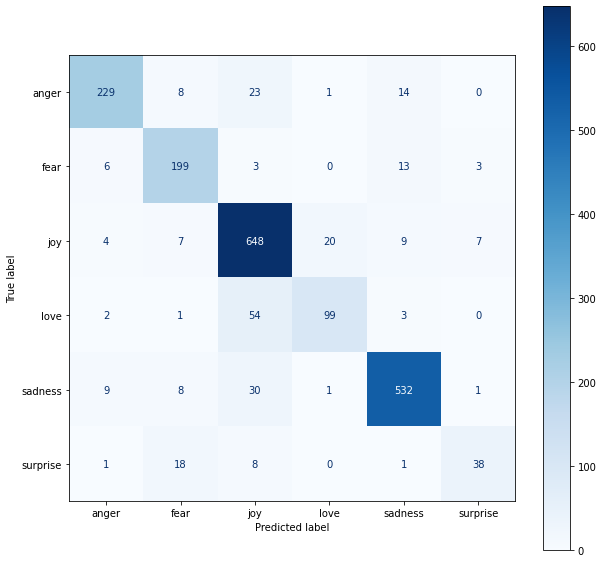

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
metrics.ConfusionMatrixDisplay.from_predictions(test_label, test_label_predicted, cmap = "Blues", display_labels = forest.classes_, ax = ax)
plt.savefig("version4_after_tuning_c_matrix.png")
plt.show()

In [ ]:
del train_valid_dummy, test_dummy, forest, model, precision_recall_fscore_support, fig, ax
gc.collect()

17363

In [ ]:
# version 5

In [ ]:
train_valid_dummy = pd.read_csv("stemming_train_valid_dummy.csv", header = 0, index_col = 0)
train_valid_dummy

,feel,humili,go,hopeless,damn,hope,around,someon,care,awak,...,mandat,vaccin,consent,texa,mash,jrock,tommorrow,textbook,rye,ssa
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_dummy = pd.read_csv("version5_test_dummy.csv", header = 0, index_col = 0)

In [ ]:
#shuffle train_valid
train_valid_dummy.insert(10833, 'emotion_label', train_valid_data['label'])
train_valid_dummy_label = utils.shuffle(train_valid_dummy, random_state = 10) 
train_valid_label = train_valid_dummy_label["emotion_label"]
train_valid_label

10802     sadness
5034         fear
7641     surprise
15243     sadness
17469       anger
           ...   
9372          joy
7291          joy
17728         joy
7293        anger
17673       anger
Name: emotion_label, Length: 18000, dtype: object

In [ ]:
train_valid_dummy = train_valid_dummy_label.drop('emotion_label', axis = 1)
train_valid_dummy

,feel,humili,go,hopeless,damn,hope,around,someon,care,awak,...,mandat,vaccin,consent,texa,mash,jrock,tommorrow,textbook,rye,ssa
10802,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5034,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7641,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15243,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17469,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7291,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17728,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7293,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# shuffle test
test_dummy.insert(10833, 'emotion_label', test_data['label'])
test_dummy_label = utils.shuffle(test_dummy, random_state = 10) 
test_label = test_dummy_label["emotion_label"]
test_label

115         joy
1779    sadness
1449        joy
145     sadness
1009        joy
         ...   
1393    sadness
1344    sadness
527     sadness
1149      anger
1289      anger
Name: emotion_label, Length: 2000, dtype: object

In [ ]:
test_dummy = test_dummy_label.drop('emotion_label', axis = 1)
test_dummy

,feel,humili,go,hopeless,damn,hope,around,someon,care,awak,...,mandat,vaccin,consent,texa,mash,jrock,tommorrow,textbook,rye,ssa
115,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1779,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1449,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1009,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1344,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1149,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
del train_valid_dummy_label, test_dummy_label
gc.collect()

6028

In [ ]:
## 建模
forest = ensemble.RandomForestClassifier(random_state = 10)
model = forest.fit(train_valid_dummy, train_valid_label)

In [ ]:
# 預測test data
test_label_predicted = model.predict(test_dummy)
# accuracy 
accuracy = metrics.accuracy_score(test_label, test_label_predicted)
accuracy

0.8475

In [ ]:
# precision recall fscore 
precision_recall_fscore_support = metrics.precision_recall_fscore_support(test_label, test_label_predicted, labels = forest.classes_)
precision_recall_fscore_support = pd.DataFrame(precision_recall_fscore_support, columns = forest.classes_, index = ["precision", "recall", "fscore", "support"])
precision_recall_fscore_support.to_excel('version5_metric_table.xlsx')
precision_recall_fscore_support

,anger,fear,joy,love,sadness,surprise
precision,0.847458,0.798246,0.894345,0.664516,0.908451,0.524390
recall,0.909091,0.812500,0.864748,0.647799,0.888124,0.651515
fscore,0.877193,0.805310,0.879298,0.656051,0.898172,0.581081
support,275.000000,224.000000,695.000000,159.000000,581.000000,66.000000


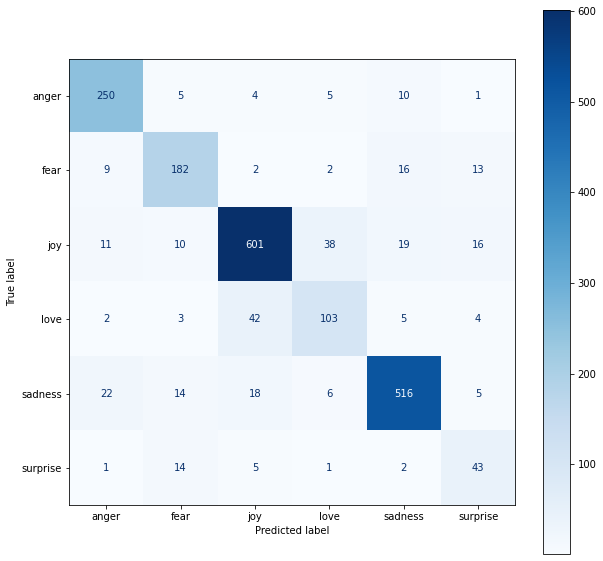

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
metrics.ConfusionMatrixDisplay.from_predictions(test_label, test_label_predicted, cmap = "Blues", display_labels = forest.classes_, ax = ax)
plt.savefig("version5_confusion_matrix.png")
plt.show()